In this project we are going to try to predict the house prices in Ames, Iowa. The dataset consists of roughly 3000 houses, split equally in training and test set. Each house in the dataset is described by 80 variables that include any information that a house listing could possibly include. 

The structure of this notebook is the following:
In the first section, the development environment is set up, the train and test sets are loaded and we are taking a quick look at the dataframes. <br/>

In the second section, the datasets get explored.We are looking for possible outliers that will skew the models during training, and are investigating what is the best way to fill in each missing value.<br/>

Section 3 is handling data cleaning. This includes removing outliers from the data, filling in missing values and categorifying ordinal variables.<br/>

Finally, sections 4 and 5 revolve around developing a model, training it on the data and evaluating the results. The model's basic idea is to create multiple regressor algorithms and average over their results.


# 1. Setting up environment

In [1]:
import numpy as np
import pandas as pd 


import os        
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

data/data_description.txt
data/test.csv
data/train.csv


In [2]:
color = sns.color_palette()
sns.set_style('darkgrid')

In [3]:
path = 'data'
path = Path(path)
train_raw = pd.read_csv(path/'train.csv')
test_raw = pd.read_csv(path/'test.csv')

train = train_raw.copy(deep=True)
test = test_raw.copy(deep=True)
data_clean = [train_raw,test_raw]

In [4]:
print("Dataset dimensions: ")
print("Training Set: " ,train.shape)
print("Test Set: " ,test.shape)

Dataset dimensions: 
Training Set:  (1460, 81)
Test Set:  (1459, 80)


In [5]:
train.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
test.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [7]:
print("Variables with missing values in the dataset:")
print("Training set: " ,train.isnull().any().sum())
print("Test set: ", test.isnull().any().sum())

Variables with missing values in the dataset:
Training set:  19
Test set:  33


We shall now save the house prices from the training set and unify train and test set to explore and fill in missing values.

In [8]:
y_train = train['SalePrice']
x_train = train.drop('SalePrice',axis = 1)

data = pd.concat([x_train,test],ignore_index= True, verify_integrity = True,copy = True)
print(data.shape)

(2919, 80)


# 2. Data Exploration

## 2.1 Outliers

Outliers in regression models can skew the performance significantly, since many advanced models are very sensitive to them. Therefore, we are looking for houses that were sold at a price lower than the expected value of the dataset. To achieve that, we plot the SalePrice of each house in the training set over the Lot Area and the above-ground living area.

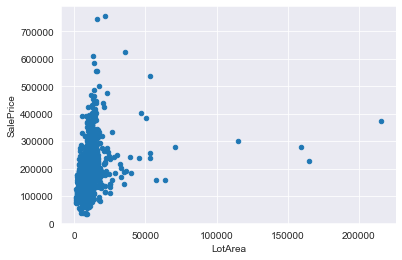

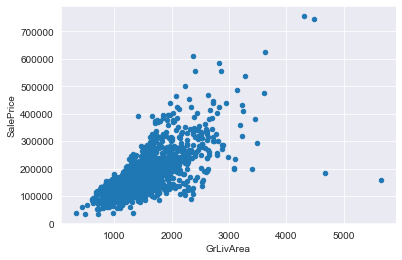

In [9]:
train.plot.scatter(x = 'LotArea',y = 'SalePrice')
train.plot.scatter(x = 'GrLivArea',y = 'SalePrice')

In the first plot, it cannot be concluded whether the points on the right part should be considered outliers. A bigger Lot Area is usually found in agricultural areas where the prices are lower than in urban areas. However, the 2 points on the lower right part of the second figure are definitely outliers, sold at a lower price than they should have been, and will be removed from the dataset.

In [10]:
idx_outliers =train[['GrLivArea','SalePrice']][(train['GrLivArea']>4000) & (train['SalePrice']<300000)]

## 2.2 Correlation of variables to house price


By computing the correlation between the numerical features of the data to the sale price, we get a first rough idea of which numerical variables are the most relevant to the target.

In [11]:
pd.options.display.max_rows = 50
price_corr = train[train.notnull()].corr(method='pearson')['SalePrice'].abs()
price_corr = pd.DataFrame(price_corr)
price_corr.sort_values(by = 'SalePrice',ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## 2.3 Missing values

The most important data cleaning procedure is to understand where missing values lie in the data and decide how to fill them.

In [12]:
mv = data.isnull().sum()/data.shape[0]*100
mv = mv[mv>0]
mv = mv.sort_values(axis = 0,ascending = False)

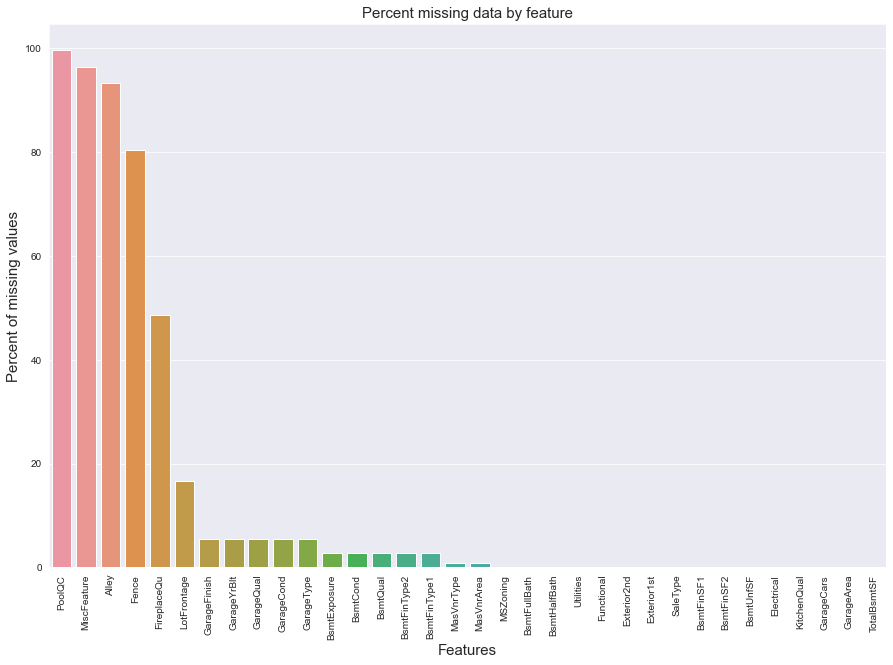

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(mv.index,mv)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

Some missing values may be dependent on each other. For example, GarageQual is logically missing if there is no garage and pool quality is also logically missing when the proberty does not have a pool. This explains why some features have such a high percentage of missing values. Therefore, we have to go through each missing value variable one at a time to create a strategy on filling the missing values in a meaningful way.

### 2.3.1 Garage-related

There are 7 variables in the dataset with missing values related to the garage. We shall examine them all together. According to the documentation, if GarageType is NaN,then the property does not contain any garage space. 

In [14]:
garage = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt']

In [15]:
idx = data['GarageType'].isnull()
print("Total properties without a garage: ",idx.sum())
print("Non-NaN entries in properties without a garage: ")
print(data[garage][idx].notnull().sum())

Total properties without a garage:  157
Non-NaN entries in properties without a garage: 
GarageArea      157
GarageCars      157
GarageCond        0
GarageFinish      0
GarageQual        0
GarageType        0
GarageYrBlt       0
dtype: int64


5 of the 7 variables have no values entered in the aforementioned categories, while GarageArea and GarageCars are entried for all those properties.

In [16]:
idx = data['GarageType'].isnull() & data['GarageArea'].notnull() & data['GarageCars'].notnull()
print("Total Garage Area and Cards in properties without a garage:")
print(data[['GarageCars','GarageArea']][idx].sum())

Total Garage Area and Cards in properties without a garage:
GarageCars    0.0
GarageArea    0.0
dtype: float64


We see that those values were set to 0 even though no garage was mentioned, which makes sense. Therefore, no abnormality in the data is detected. 

In [17]:
idx = data['GarageArea'].isnull()
data[['GarageArea','GarageCars','GarageQual']][idx]

,GarageArea,GarageCars,GarageQual
2576,NaN,NaN,NaN


There is one property where GarageArea and GarageCars are not entered, and since there is no Garage, they shall be set to 0.

### 2.3.2 Basement-related

The second major category of missing values are related to basements. We will follow the same procedure as above to examine them. We will also later create a variable called hasBsmt to denote whether the building has a basement or not. This information can be extracted from the BsmtQual variable.

In [18]:
bsmt = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF','TotalBsmtSF']
idx = data['BsmtQual'].isnull()
data[bsmt][idx].notnull().sum()

BsmtCond         2
BsmtExposure     2
BsmtFinSF1      80
BsmtFinSF2      80
BsmtFinType1     2
BsmtFinType2     2
BsmtFullBath    79
BsmtHalfBath    79
BsmtQual         0
BsmtUnfSF       80
TotalBsmtSF     80
dtype: int64

This is weird and probably means that there may be something wrong with the data. Let's examine this further. First we consider the BsmtCond variable.

In [19]:
idx = data['BsmtQual'].isnull() & data['BsmtCond'].notnull()
data[bsmt][idx]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
2217,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
2218,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0


Looking at the dataset description, these 2 entries have an unfinished basement without exposure, while the basement condition is fair in one case and typical in the other.Fair and typical are defined as:

* Typical - slight dampness allowed
* Fair - dampness or some cracking or settling

Since these 2 properties do have a basement, even though it is small and unfinished, the hasBsmt variable should be set to 1. Additionally, it seems that these 2 basements are actually more fit to be used as storage space rather than as a functional part of the house. Therefore, they shall be filled with the median quality of unfinished basements with no exposure.



Next we shall take a look at the variables BsmtFinSF1 and BsmtFinSF2.

In [20]:
idx = data['BsmtQual'].isnull() & data['BsmtFinSF1'].notnull()
data[bsmt][idx]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
39,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
90,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
102,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
156,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2803,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2804,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2824,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2891,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [21]:
print(data[['BsmtFinSF1','BsmtFinSF2']][idx].sum())

BsmtFinSF1    0.0
BsmtFinSF2    0.0
dtype: float64


As we can see, the entries are just zeros. Nothing out of the ordinary here as well.

In [22]:
idx = data['BsmtFinSF2'].isnull()
data[['BsmtCond','BsmtFinSF1','BsmtFinSF2']][idx]

,BsmtCond,BsmtFinSF1,BsmtFinSF2
2120,NaN,NaN,NaN


Since there is no basement here either, they also should be set to 0.

In [23]:
idx = data['BsmtQual'].isnull() & data['BsmtFullBath'].notnull()
data[['BsmtFullBath','BsmtHalfBath']][idx].sum()

BsmtFullBath    0.0
BsmtHalfBath    0.0
dtype: float64

The same applies for baths in the basement.

In [24]:
idx = data['BsmtQual'].isnull() & data['BsmtUnfSF'].notnull()
data[['BsmtUnfSF','TotalBsmtSF']][idx].sum()

BsmtUnfSF      529.0
TotalBsmtSF    529.0
dtype: float64

In [25]:
idx = data['BsmtQual'].isnull() & data['BsmtUnfSF']>0
data[['BsmtUnfSF','TotalBsmtSF']][idx]

,BsmtUnfSF,TotalBsmtSF
2217,173.0,173.0
2218,356.0,356.0


These are the same 2 properties that we saw before. We can safely leave them as they are, as there is no abnormality here either.

In [26]:
pd.options.display.max_rows = 15
idx = data['BsmtExposure'].isnull() & data['BsmtCond'].notnull()
data[bsmt][idx]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
948,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,936.0,936.0
1487,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
2348,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,725.0


For these properties, BsmtExposure is set to indicate that no basement is present, even though there is a basement that is just unfinished. We are going to assume that the basement has no exposure. 

In [27]:
idx = data['BsmtCond'].notnull() & data['BsmtFinType1'].isnull()
data[bsmt][idx]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF


In [28]:
idx = data['BsmtCond'].notnull() & data['BsmtFinType2'].isnull()
data[bsmt][idx]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
332,TA,No,1124.0,479.0,GLQ,NaN,1.0,0.0,Gd,1603.0,3206.0


In the one case where BsmtFinType2 is missing when a basement exists, we see that the basement has 1600 square feet of unfinished space. Therefore, BsmtFinType2 shall be set to unfinished.

In [29]:
idx = data['BsmtCond'].notnull() & data['BsmtFullBath'].isnull()
print(data[bsmt][idx])
idx = data['BsmtCond'].notnull() & data['BsmtHalfBath'].isnull()
print(data[bsmt][idx])

Empty DataFrame
Columns: [BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, TotalBsmtSF]
Index: []
Empty DataFrame
Columns: [BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, TotalBsmtSF]
Index: []


Bath variables related to basements are only missing when there is no basement. Therefore, nothing special has to be done for them.

In [30]:
idx = data['BsmtCond'].notnull() & data['BsmtUnfSF'].isnull()
data[bsmt][idx]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF


BsmtUnfSF is also only missing when there is no basement, therefore its missing values are set to 0.

In [31]:
idx = data['BsmtCond'].notnull() & data['TotalBsmtSF'].isnull()
data[bsmt][idx]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF


Since no basement has a missing TotalBsmtSF value, it is only missing when no basement is present. Therefore, the missing values will be set to 0.

### 2.3.3 Other variables

There are also some variables where, according to the documentation, a missing value denotes the absence of the corresponding feature. For example, if Fence is NaN for a property, then the property has no fence. These aren't really missing values and we will deal with them later when we categorify ordinal variables. 

The documentation instructs to assume typical functionality unless deductions are warranted. Therefore, the missing values in Functional will be filled in with Typ. As for the Electrical and KitchenQual variables, they will be filled with the median of the corresponding house zoning (found in MSZoning). Finally, Utilities will be filled in with the median according to Functional. When LotFrontage is missing, it is assumed that no lot frontage is present and therefore is set to 0.

Moving to the Exterior 1st and 2nd variables that describe the exterior of the house, we would like to check whether the Exterior2nd variable is obsolete. Therefore, we would like to see in how many properties Exterior2nd differs from Exterior1st. However, Exterior2nd values have in some cases a different name than in Exterior1st for the same thing. This should be fixed. These values are:

* Brk Cmn --> BrkComm
* CmentBd --> CemntBd
* Wd Shing  --> WdShing

In [32]:
dict_ext = {'Brk Cmn':'BrkComm',
            'CmentBd':'CemntBd',
            'Wd Shng': 'WdShing'
           }
data['Exterior2nd'] = data['Exterior2nd'].replace(dict_ext)

In [33]:
v = ['Exterior1st','Exterior2nd']
idx = data['Exterior1st']!=data['Exterior2nd']
data[v][idx]

,Exterior1st,Exterior2nd
3,Wd Sdng,WdShing
8,BrkFace,WdShing
12,HdBoard,Plywood
19,BrkFace,Plywood
39,AsbShng,Plywood
...,...,...
2877,MetalSd,Stucco
2880,Wd Sdng,WdShing
2882,Stucco,Wd Sdng
2904,CBlock,VinylSd


About ~9% of the properties have different exterior materials, which is enough to keep the variable. Moving on to see what is going on with the missing values.

In [34]:
pd.options.display.max_columns = 100

idx = data['Exterior1st'].isnull()
data[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2151,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In the one property with missing exterior values, they will be set according to the most frequent exterior cover for this neighborhood.

In [35]:
idx = data['MasVnrType'].isnull()
data[['MasVnrArea','MasVnrType']][idx]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
...,...,...
2592,NaN,NaN
2610,198.0,NaN
2657,NaN,NaN
2686,NaN,NaN


MasVnrArea's missing values will be set to 0, while MasVnrType will be set to None. In the one case where a veneer area is entered without a veneer type, the area will be corrected to 0.

In [36]:
data[data['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2250,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2904,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


The missing MSZoning values can be will with the median MSZoning value grouped by neighborhood, as properties in the same neighborhood should fall into the same zoning classification.

In [37]:
data[data['SaleType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2489,2490,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal


Finally, the missing sale type value should be irrelevant to the final price of each property and will be dropped.

# 3. Data Cleaning

Now that all missing values have been explored, we are in a position to start cleaning the dataset.

## 3.1 Dropping outliers

To avoid  any error, we will first drop the outliers from the training set and then re-initialize the 'data' dataframe to fill in the missing values and convert to ordinal data.

In [38]:
train = train.drop(idx_outliers.index, axis = 0)

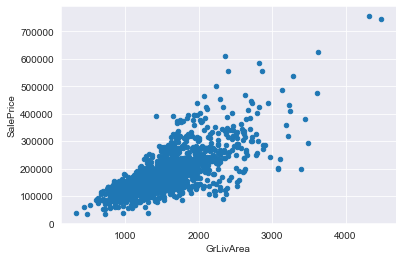

In [39]:
train.plot.scatter(x = 'GrLivArea',y = 'SalePrice')

Now the sale prices have a much clearer correlation and fitting a regression model on it will not be skewed by outliers. We can now recreate the 'data' dataframe and start cleaning the data.

In [40]:
y_train = train['SalePrice']
x_train = train.drop('SalePrice',axis = 1)

del data
data = pd.concat([x_train,test],ignore_index= True, verify_integrity = True,copy=True)

In [41]:
dict_ext = {'Brk Cmn':'BrkComm',
            'CmentBd':'CemntBd',
            'Wd Shng': 'WdShing'
           }
data['Exterior2nd'] = data['Exterior2nd'].replace(dict_ext)

## 3.2 Filling in missing values and fix wrong entries

Before we convert the data to datatypes fit for training, the missing values should be filled in according to the analysis presented above. At the same time, any "wrong" data will be fixed. The whole process will be encapsulated into a function to ease readability and enable code reproducability.

In [42]:
def set_value(df,value, variables):
    assert type(variables)==list,"variables must be passed on as list"
    var0,var1 = variables
    idx = df[var0].notnull() & data[var1].isnull()
    loc = df[var1][idx].index[0]
    df.at[loc,var1] = value
    return df

def findStringMostCommon(d,target,conds, tvals=None):
    assert type(conds) == list, "Targetvars must be passed on as a list"
    assert len(conds)<3
    if tvals:
        if len(conds)>1:
            cond0,cond1 = conds
            tval0,tval1 = tvals    
            selected_data = d[target][(d[cond0]==tval0) & (d[cond1]==tval1)].sort_values()
        else:
            selected_data = d[target][d[conds]==tvals].sort_values()
    else:
        conds = conds[0]
        selected_data = d[target].groupby(conds).value_counts()
    
    return selected_data.value_counts().index[0]

def set_conditional(df,target,cond):
    idx = df[target].isnull()
    for i in idx.index:
        if idx[i]:
            stats = df[target][df[cond]==df.loc[i,cond]].value_counts()
            df.at[i,target] = stats.index[0]
    return df

In [43]:
def fill_and_fix(df):
    df_cp = df.copy(deep= True)
    vars_cat = ['Alley','BsmtCond','BsmtFinType1','BsmtFinType2','Fence','FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType','MiscFeature','PoolQC','BsmtQual']
    
    vars_num = ['BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','GarageArea','GarageCars','LotFrontage', 'TotalBsmtSF','MasVnrArea','GarageYrBlt']
    df_cp = set_value(df_cp,'Unf',['BsmtQual','BsmtFinType2'])
    df_cp = set_value(df_cp,findStringMostCommon(df_cp,'BsmtQual',['BsmtExposure','BsmtFinType1'],['No','Unf']),['BsmtCond','BsmtQual'])
    
    for v in ['Exterior1st','Exterior2nd','MSZoning','Utilities']:
        df_cp = set_conditional(df_cp,v,'Neighborhood')
        
    for v in ['Electrical','KitchenQual']:
        df_cp = set_conditional(df_cp,v,'MSZoning')
     
    idx = df_cp['MasVnrType'].isnull() & df_cp['MasVnrArea'].notnull()
    df_cp.at[idx[idx==True].index[0],'MasVnrArea']= 0 
    
    for var in vars_cat:
        df_cp[var].fillna(value = '0',inplace = True)
        
    for var in vars_num:
        df_cp[var].fillna(value = 0,inplace = True)
        
    df_cp['BsmtExposure'].fillna(value = '0',inplace = True)
    df_cp['Functional'].fillna(value = 'Typ',inplace = True) 
    df_cp['MasVnrType'].fillna(value = 'None',inplace = True)     
    
    return df_cp

In [44]:
data  = fill_and_fix(data)
print("Missing values after cleaning: ",data.isnull().sum().sum())

Missing values after cleaning:  1


The only missing value in the data is in the SaleType variable, which will later be dropped since it should make no difference on the house prices.

## 3.3 Feature Engineering

Before we continue, we are going to crease some features and revamp some others. We are adding 3 variables: 

* TotalSF: The living area of a property, including 1st floor, 2nd floor and basement.
* hasGarage: Variable indicating whether the property has a garage
* hasBsmt: Variable indicating whether the property has a basement

We are also changing variables that indicate the age of some features of the house.
* GarageAge: Replaces GarageYrBlt and equals to YearSold-GarageYrBlt
* HouseAge: Replaces YearBlt, equals to YearSold-YearBuilt
* RemodAge: Replaces YearRemodADd, equals to YearSold-YearRemodAdd


In [45]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [46]:
data['hasGarage'] =  np.where(data['GarageQual']!='0', 1, 0)
data['hasBsmt'] =  np.where(data['BsmtCond']!='0', 1, 0)

data['GarageAge'] = data['YrSold']-data['GarageYrBlt']
data['GarageAge'] = np.where(data['GarageAge']<0,100,0)
data['HouseAge'] = data['YrSold']-data['YearBuilt']
data['RemodAge'] = data['YrSold']-data['YearRemodAdd']

data_clean = data.drop(labels = ['SaleType','GarageYrBlt','YearBuilt','YearRemodAdd'],axis = 1)

## 3.4 Converting categorical to ordinal data

Most variables in the dataset are categorical. In order to train a model, these should be converted to ordinal, meaning that the categories of each variable will be indicated through a number. The conversion procedure is saved in a dictionary, in case we would like to know the original category of each variable.

In [47]:
ordinal = ['Alley','BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','Condition1','Condition2','Electrical','ExterCond','Exterior1st','Exterior2nd',\
           'ExterQual', 'Fence','FireplaceQu','Foundation','Functional','GarageCond','GarageFinish','GarageQual','GarageType','Heating','HeatingQC','HouseStyle','KitchenQual','LandContour',\
           'LandSlope','LotConfig','LotShape','MasVnrArea','MasVnrType','MiscFeature','MSSubClass','MSZoning','Neighborhood','OverallCond','OverallQual','PavedDrive','PoolQC','RoofMatl',\
           'RoofStyle','SaleCondition','Street','Utilities']

In [48]:
def categorify(df, var, d = None):
    df_cp = df.copy(deep=True)
    codebook = d if d else dict()  
    for v in var:
        if v not in codebook.keys():
            df_cp[v] = df_cp[v].astype('category')
            keys = np.sort(df[v].unique())
            if np.array_equal(keys,np.arange(len(keys))):
                assert bool(codebook),"No dictionary provided. Please provide a dictionary to avoid overwriting values"
            else:
                df_cp[v] = df_cp[v].cat.reorder_categories(keys,ordered=True)
                values = df_cp[v].cat.codes
                df_cp[v] = values
                codebook[v] = list(zip(keys,np.arange(len(keys))))
    return df_cp,codebook


In [49]:
data,codebook = categorify(data_clean,ordinal)

## 3.5 Normalizing numerical values

Finally, we are normalizing the numerical variables in the dataset to ease the regression fitting process.

In [50]:

need_norm = ['1stFlrSF','2ndFlrSF','3SsnPorch','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','EnclosedPorch','GarageArea','MasVnrArea','OpenPorchSF','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF','LotArea','LotFrontage','TotalSF']

In [51]:
def normalize(df,need_norm):
    df = df.astype('float64')
    for v in need_norm:
        df[v] = (df[v]-df[v].mean())/df[v].std()
    return df
data_final = normalize(data,need_norm)
data_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,TotalSF,hasGarage,hasBsmt,GarageAge,HouseAge,RemodAge
0,1.0,5.0,3.0,0.221714,-0.216400,1.0,0.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,6.0,4.0,1.0,0.0,12.0,13.0,1.0,0.704263,2.0,4.0,2.0,3.0,4.0,4.0,3.0,0.601411,6.0,-0.293084,-0.933602,-0.449314,1.0,0.0,1.0,4.0,-0.783079,1.210266,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,0.0,2.0,2.0,2.0,0.352727,5.0,5.0,2.0,-0.739963,0.204412,-0.359678,-0.103349,-0.285992,-0.060437,0.0,0.0,0.0,0.0,2.0,2008.0,4.0,0.030059,1.0,1.0,0.0,5.0,5.0
1,2.0,0.0,3.0,0.674466,-0.069097,1.0,0.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,5.0,7.0,1.0,0.0,8.0,8.0,2.0,-0.624027,3.0,4.0,1.0,3.0,4.0,2.0,1.0,1.213775,6.0,-0.293084,-0.628848,0.496033,1.0,0.0,1.0,4.0,0.270743,-0.784504,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,5.0,2.0,2.0,2.0,-0.057028,5.0,5.0,2.0,1.615161,-0.704422,-0.359678,-0.103349,-0.285992,-0.060437,0.0,0.0,0.0,0.0,5.0,2007.0,4.0,-0.023713,1.0,1.0,0.0,31.0,31.0
2,3.0,5.0,3.0,0.312265,0.142251,1.0,0.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,6.0,4.0,1.0,0.0,12.0,13.0,1.0,0.452965,2.0,4.0,2.0,3.0,4.0,3.0,3.0,0.106117,6.0,-0.293084,-0.287705,-0.300294,1.0,0.0,1.0,4.0,-0.616960,1.238295,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,5.0,2.0,2.0,2.0,0.632106,5.0,5.0,2.0,-0.739963,-0.078668,-0.359678,-0.103349,-0.285992,-0.060437,0.0,0.0,0.0,0.0,9.0,2008.0,4.0,0.209300,1.0,1.0,0.0,7.0,6.0
3,4.0,6.0,3.0,0.070797,-0.075501,1.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,6.0,4.0,1.0,0.0,13.0,15.0,2.0,-0.624027,3.0,4.0,0.0,4.0,2.0,4.0,1.0,-0.501744,6.0,-0.293084,-0.046631,-0.682158,1.0,2.0,1.0,4.0,-0.510539,0.981358,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,3.0,6.0,3.0,3.0,0.790420,5.0,5.0,2.0,-0.739963,-0.182960,3.872900,-0.103349,-0.285992,-0.060437,0.0,0.0,0.0,0.0,2.0,2006.0,0.0,-0.089008,1.0,1.0,0.0,91.0,36.0
4,5.0,5.0,3.0,0.795200,0.527801,1.0,0.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,7.0,4.0,1.0,0.0,12.0,13.0,1.0,1.763304,2.0,4.0,2.0,3.0,4.0,1.0,3.0,0.486593,6.0,-0.293084,-0.160345,0.223605,1.0,0.0,1.0,4.0,-0.032945,1.675089,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,5.0,2.0,2.0,3.0,1.693745,5.0,5.0,2.0,0.777432,0.547087,-0.359678,-0.103349,-0.285992,-0.060437,0.0,0.0,0.0,0.0,12.0,2008.0,4.0,1.024846,1.0,1.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915.0,13.0,4.0,-1.106357,-1.050775,1.0,0.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,3.0,5.0,3.0,6.0,1.0,0.0,5.0,5.0,2.0,-0.624027,3.0,4.0,1.0,4.0,4.0,4.0,6.0,-0.988033,6.0,-0.293084,-0.032985,-1.171131,1.0,2.0,1.0,4.0,-1.587722,0.490841,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,-2.198931,0.0,0.0,2.0,-0.739963,-0.704422,-0.359678,-0.103349,-0.285992,-0.060437,0.0,0.0,0.0,0.0,6.0,2006.0,4.0,-1.158052,0.0,1.0,0.0,36.0,36.0
2913,2916.0,13.0,4.0,-1.106357,-1.056155,1.0,0.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,4.0,5.0,3.0,4.0,1.0,0.0,5.0,5.0,2.0,-0.624027,3.0,4.0,1.0,4.0,4.0,4.0,5.0,-0.420696,6.0,-0.293084,-0.606105,-1.

## 3.6 Fixing target and creating train, test set.


Finally, we are going to take a look at the distribution of SalePrice

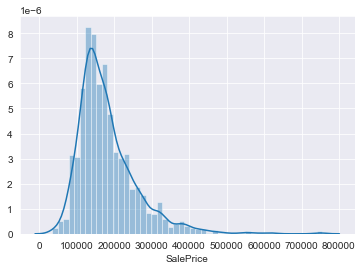

In [52]:
sns.distplot(y_train)

The prices resemble a left-skewed normal distribution. Since regression models work better with normally distributed data, we are going to apply a logarithmic function to them to normalize them.

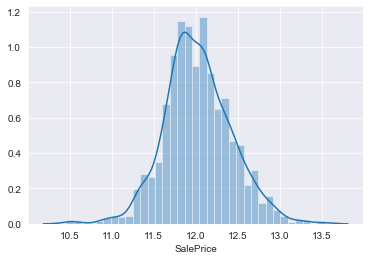

In [53]:
y_train_log = np.log(y_train)
sns.distplot(y_train_log)

Splitting data back into train and test set and droppign 'Id' variable:

In [54]:
data_final = data
m = train_raw.shape[0]-2
x_train = data_final.loc[:(m-1),:]
x_test = data_final.loc[m:,:]

In [55]:
xtrain  = x_train.drop(labels = 'Id', axis = 1)
xtest = x_test.drop(labels = 'Id',axis = 1)

# 4. Model Training

The idea of the model is to use 6 different regression techniques and to average over their result. The algorithms used are:
* Lasso
* ElasticNet
* Ridge Regression
* Gradient Boosting Regression
* XGBoost Regressor
* LightGBM Regressor

In [56]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

We use the **cross_val_score** function of Sklearn to create a 5-fold cross validation function that returns the logarithmic Root Mean Squared Error for each model.

In [57]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(xtrain)
    rmse= np.sqrt(-cross_val_score(model, xtrain, y_train_log, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Base Models:

-  **LASSO  Regression**  : 

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's  **Robustscaler()**  method on pipeline.

In [58]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- **Elastic Net Regression** :

again made robust to outliers

In [59]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- **Ridge Regression** :

Normal Ridge regression

In [60]:
RR = Ridge(alpha=0.8)

- **Gradient Boosting Regression** :

With **huber**  loss that makes it robust to outliers
    

In [61]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- **XGBoost** :

In [62]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

- **LightGBM** :

In [63]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Model performance on the data by evaluating the  cross-validation rmsle error[](http://)

In [64]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(RR)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1223 (0.0047)

ElasticNet score: 0.1223 (0.0047)

Ridge score: 0.1227 (0.0043)

Gradient Boosting score: 0.1184 (0.0076)

Xgboost score: 0.1161 (0.0075)

LGBM score: 0.1159 (0.0072)



## 4.1 Averaging models

We begin with this simple approach of averaging base models.  We build a new **class**  to extend scikit-learn with our model and also to laverage encapsulation and code reuse ([inheritance][1]) 


  [1]: https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)

In [65]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, RR, lasso,model_xgb,model_lgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
%%capture
averaged_models.fit(xtrain, y_train_log)

# Results

Since we had applied a logarithmic smoothing on the targets, this process has to be reverted. 

In [ ]:
train_pred = np.exp(averaged_models.predict(xtrain))
test_pred = np.exp(averaged_models.predict(xtest))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = x_test['Id'].astype('int32')
submission['SalePrice'] = test_pred
submission.to_csv('submission.csv',index=False)